In [1]:
import cv2
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import numpy as np
import threading
import DobotDllType as dType
import math


In [ ]:
# Open a connection to the default camera (usually the first camera device found)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Error: Could not open camera.")
    # exit()

In [ ]:
try:
    while True:
        # Read a frame from the camera
        ret, frame = cap.read()

        # If frame reading was not successful, break the loop
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame from BGR (OpenCV format) to RGB (Matplotlib format)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame using Matplotlib
        plt.imshow(frame_rgb)
        plt.axis('off')  # Hide axis
        display(plt.gcf())  # Display the current figure
        clear_output(wait=True)  # Clear the output to update the display

        # Wait for 1 second before capturing the next frame
        time.sleep(1)

except KeyboardInterrupt:
    pass

# Release the camera
cap.release()

In [ ]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()


In [5]:
# Load the main image and the template
img = cv2.imread('image2-edit.png')#, cv2.IMREAD_GRAYSCALE)

# ret, frame = cap.read()
# main_image = cv2.cvtColor(frame, cv2.IMREAD_GRAYSCALE)

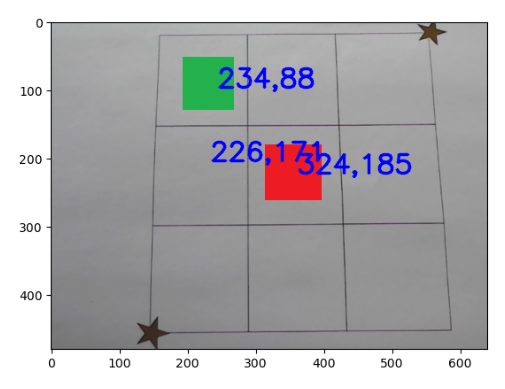

In [6]:
import cv2
import numpy as np
from IPython.display import display, clear_output
from matplotlib import pyplot as plt

# Callback function to capture mouse events
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f'Clicked at: x={x}, y={y}')
        # Optionally, display the clicked point on the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, f'{x},{y}', (x, y), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
        display_image(img)
        
# Function to display image using IPython display
def display_image(img):
    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Display the image
display_image(img)

# Set the mouse callback function to capture click events
cv2.namedWindow('image')
cv2.setMouseCallback('image', click_event)

# Use a loop to keep the window open for capturing events
while True:
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:  # Exit on pressing 'ESC'
        break

cv2.destroyAllWindows()

In [ ]:
template_image = cv2.imread('star2.PNG', cv2.IMREAD_GRAYSCALE)
plt.imshow(template_image)

In [ ]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(template_image, None)
kp2, des2 = orb.detectAndCompute(main_image, None)

# Create a BFMatcher object with default parameters
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Match descriptors
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)

In [ ]:
for match in good_matches:
    print(match.distance, match.imgIdx, match.queryIdx, match.trainIdx)

In [ ]:
des1.shape

In [ ]:
kp1[0].pt

In [ ]:
matches[0]

In [ ]:
# Sort the good matches based on distance
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Find the best two matches that are at least 30 pixels away from each other
best_match_1 = None
best_match_2 = None

if len(good_matches) >= 2:
    best_match_1 = good_matches[0]
    pt1 = kp2[best_match_1.trainIdx].pt

    for match in good_matches[1:]:
        pt2 = kp2[match.trainIdx].pt
        if np.linalg.norm(np.array(pt1) - np.array(pt2)) >= 20:
            best_match_2 = match
            break

if best_match_1 and best_match_2:
    pt1 = kp2[best_match_1.trainIdx].pt
    pt2 = kp2[best_match_2.trainIdx].pt

    print(f"Best match 1 coordinates: {pt1}")
    print(f"Best match 2 coordinates: {pt2}")

In [ ]:
kp2[best_match_2.trainIdx].pt

In [ ]:
# Draw the best two matches
img_matches = cv2.drawMatches(template_image, kp1, main_image, kp2, [best_match_1, best_match_2], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show matches
plt.imshow(img_matches)
plt.show()

In [ ]:
img_with_circles = main_image.copy()
cv2.circle(img_with_circles, (int(pt1[0]), int(pt1[1])), 5, (0, 255, 0), -1)
cv2.circle(img_with_circles, (int(pt2[0]), int(pt2[1])), 5, (0, 0, 255), -1)

# Show the image with circles
plt.imshow(img_with_circles, cmap='gray')

In [ ]:
pos_cord = {}
def gen_cord(pt1, pt2):
    x1, y1 = pt1[0], pt1[1]
    x2, y2 = pt2[0], pt2[1]

    middle_x, middle_y = (x1 + x2) / 2, (y1 + y2) / 2

    size = abs(x1 - x2) / 3

    pos_cord[1] = ( middle_x - size, middle_y - size )
    pos_cord[2] = ( middle_x,        middle_y - size )
    pos_cord[3] = ( middle_x + size, middle_y - size )
    pos_cord[4] = ( middle_x - size, middle_y )
    pos_cord[5] = ( middle_x,        middle_y )
    pos_cord[6] = ( middle_x + size, middle_y )
    pos_cord[7] = ( middle_x - size, middle_y + size )
    pos_cord[8] = ( middle_x,        middle_y + size)
    pos_cord[9] = ( middle_x + size, middle_y + size)

def draw_circle(img, x, y):
    img_cpy = img.copy()
    cv2.circle(img_cpy, (int(x), int(y)), 5, (0, 255, 0), -1)
    return img_cpy

In [ ]:
gen_cord(pt1, pt2)

In [ ]:
pos_cord

In [ ]:
for idx in range(1,10):
    print(idx)
    img = draw_circle(img_with_circles, pos_cord[idx][0], pos_cord[idx][1])
    plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
#Load Dll and get the CDLL object
api = dType.load()
#建立与dobot的连接
#Connect Dobot
state = dType.ConnectDobot(api, "", 115200)[0]
print("Connect status:",CON_STR[state])

In [ ]:
ref1_pos = ()
ref2_pos = ()
Z_PLANE  = None

def set_ref_1():
    pos = dType.GetPose(api)
    x = pos[0]
    y = pos[1]
    ref1_pos = (x,y)

def set_ref_2():
    pos = dType.GetPose(api)
    x = pos[0]
    y = pos[1]
    ref2_pos = (x,y)

def set_Z():
    global Z_PLANE
    pos = dType.GetPose(api)
    Z_PLANE = pos[2]



In [ ]:
main_image = cv2.imread('image2-edit.png')
plt.imshow(main_image)
plt.show()

In [ ]:
hsv_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2HSV)

In [ ]:
plt.imshow(hsv_image)

In [ ]:
def identifyColor(image, coordinates, radius=5):

    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Get the coordinates
    x, y = coordinates
    x = int(x)
    y = int(y)
    # Extract the region of interest (ROI) around the coordinates
    roi = hsv_image[y-radius:y+radius+1, x-radius:x+radius+1]

    # Calculate the mean HSV value of the ROI
    mean_hsv = np.mean(roi, axis=(0, 1))

    # Define HSV ranges for red, green, and blue
    red_lower1 = np.array([0, 70, 50])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([170, 70, 50])
    red_upper2 = np.array([180, 255, 255])
    green_lower = np.array([35, 50, 50])
    green_upper = np.array([85, 255, 255])
    blue_lower = np.array([100, 150, 0])
    blue_upper = np.array([140, 255, 255])

    # Check the color
    if ((red_lower1 <= mean_hsv).all() and (mean_hsv <= red_upper1).all()) or \
       ((red_lower2 <= mean_hsv).all() and (mean_hsv <= red_upper2).all()):
        color = "red"
    elif (green_lower <= mean_hsv).all() and (mean_hsv <= green_upper).all():
        color = "green"
    elif (blue_lower <= mean_hsv).all() and (mean_hsv <= blue_upper).all():
        color = "blue"
    else:
        color = "unknown"

    return color

checker = {}
checker["red"] = 'o'
checker["green"] = 'x'
def readBoard(image):
    board = np.array(4,4)
    for x_pos in range(1,4):
        for y_pos in range(1,4):
            idx = (y_pos-1) * 3 + x_pos
            pixel_pos = pos_cord[idx]
            color = identifyColor(image, pixel_pos)
            checker[color]
        
    

In [ ]:
identifyColor(main_image, pos_cord[1]) # pos_cord, )

In [ ]:
# # Draw matches
# img_matches = cv2.drawMatches(template_image, kp1, main_image, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# # Show matches
# plt.imshow(img_matches)
# plt.show()

# # Extract location of good matches
# if len(good_matches) > 4:
#     src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
#     dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)

#     # Find homography
#     M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
#     matches_mask = mask.ravel().tolist()

#     # Get the corners from the template image
#     h, w = template_image.shape
#     pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

#     # Apply the perspective transformation to get the coordinates in the main image
#     dst = cv2.perspectiveTransform(pts, M)

#     # Draw the detected template in the main image
#     main_image_with_template = cv2.polylines(main_image, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

#     # Show the final image with the template location
#     plt.imshow(main_image_with_template, cmap='gray')
#     plt.show()

#     # Print the coordinates
#     for point in dst:
#         print(f"Template found at: {point[0]}")
# else:
#     print("Not enough matches are found - {}/{}".format(len(good_matches), 4))